# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 5: Modelo final

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import re
import joblib
from preprocess import pfeature_process
import csv
import torch
import yaml
import sys
sys.path.insert(1, '../')
from models.network import create_model

In [2]:
#ubicacion de los archivos de datos con el modelo y el archivo FASTA procesado con CD-HIT
model_path = '../models/rf_model.pkl'
cd_hit_path = '../data/processed/VEGF.txt'

In [3]:
model = joblib.load(model_path)

In [4]:
vegf_seqs = pfeature_process(cd_hit_path)

In [5]:
vegf_predict = model.predict(vegf_seqs)
vegf_predict

array([0, 1, 1, ..., 1, 1, 0])

In [6]:
vegf_y = pd.read_csv('../data/processed/VEGF_y.csv')

In [8]:
vegf_report = classification_report(vegf_y, vegf_predict, target_names=['positive','negative'], output_dict=True)
vegf_report

{'positive': {'precision': 0.9993333333333333,
  'recall': 0.5580789277736411,
  'f1-score': 0.7161968466316292,
  'support': 2686.0},
 'negative': {'precision': 0.014119601328903655,
  'recall': 0.9444444444444444,
  'f1-score': 0.027823240589198037,
  'support': 18.0},
 'accuracy': 0.5606508875739645,
 'macro avg': {'precision': 0.5067264673311185,
  'recall': 0.7512616861090428,
  'f1-score': 0.3720100436104136,
  'support': 2704.0},
 'weighted avg': {'precision': 0.9927749578983925,
  'recall': 0.5606508875739645,
  'f1-score': 0.7116144779523527,
  'support': 2704.0}}

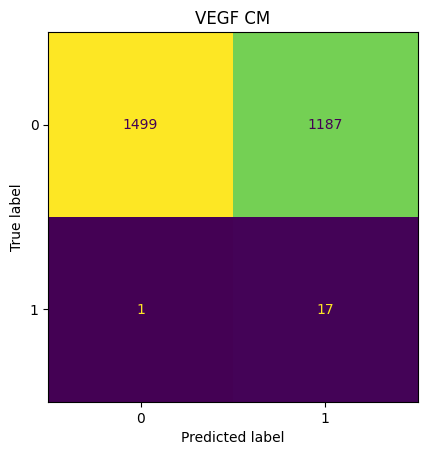

In [10]:
cm_vegf = confusion_matrix(vegf_y, vegf_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vegf)
disp.plot(colorbar=False)
disp.ax_.set_title('VEGF CM')
plt.show()